# Test Guidance Scale

In [1]:
from diffusers import StableDiffusionPipeline
from utils import image_grid
import torch

/home/shane/projects/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weights_folder_name = "shane6"
finetuned_model = "./models/shane/stable_diffusion_weights/" + weights_folder_name
no_imgs = 4
num_inference_steps = [10, 25, 50, 75, 100]
guidance_scale = 20
cols = no_imgs // 2 if no_imgs // 2 <= 5 else 5
rows = no_imgs // cols if no_imgs // cols % 2 == 0 else no_imgs // cols + 1

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(finetuned_model, torch_dtype=torch.float16).to("cuda")

/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [6]:
prompt = "a portrait photo of a shane man, smiling, handsome, photograph, photorealistic, hard rim lighting photography--beta --ar 2:3  --beta --upbeta"
n_prompt = "bad, deformed, ugly, bad anatomy, cartoon, animated, scary, wrinkles, duplicate, double"
image = [0] * len(num_inference_steps)
for i, val in enumerate(num_inference_steps):
    generator = torch.Generator("cuda").manual_seed(60)
    image[i] = pipe(prompt, negative_prompt=n_prompt, num_inference_steps=val, guidance_scale=guidance_scale).images[0]

100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


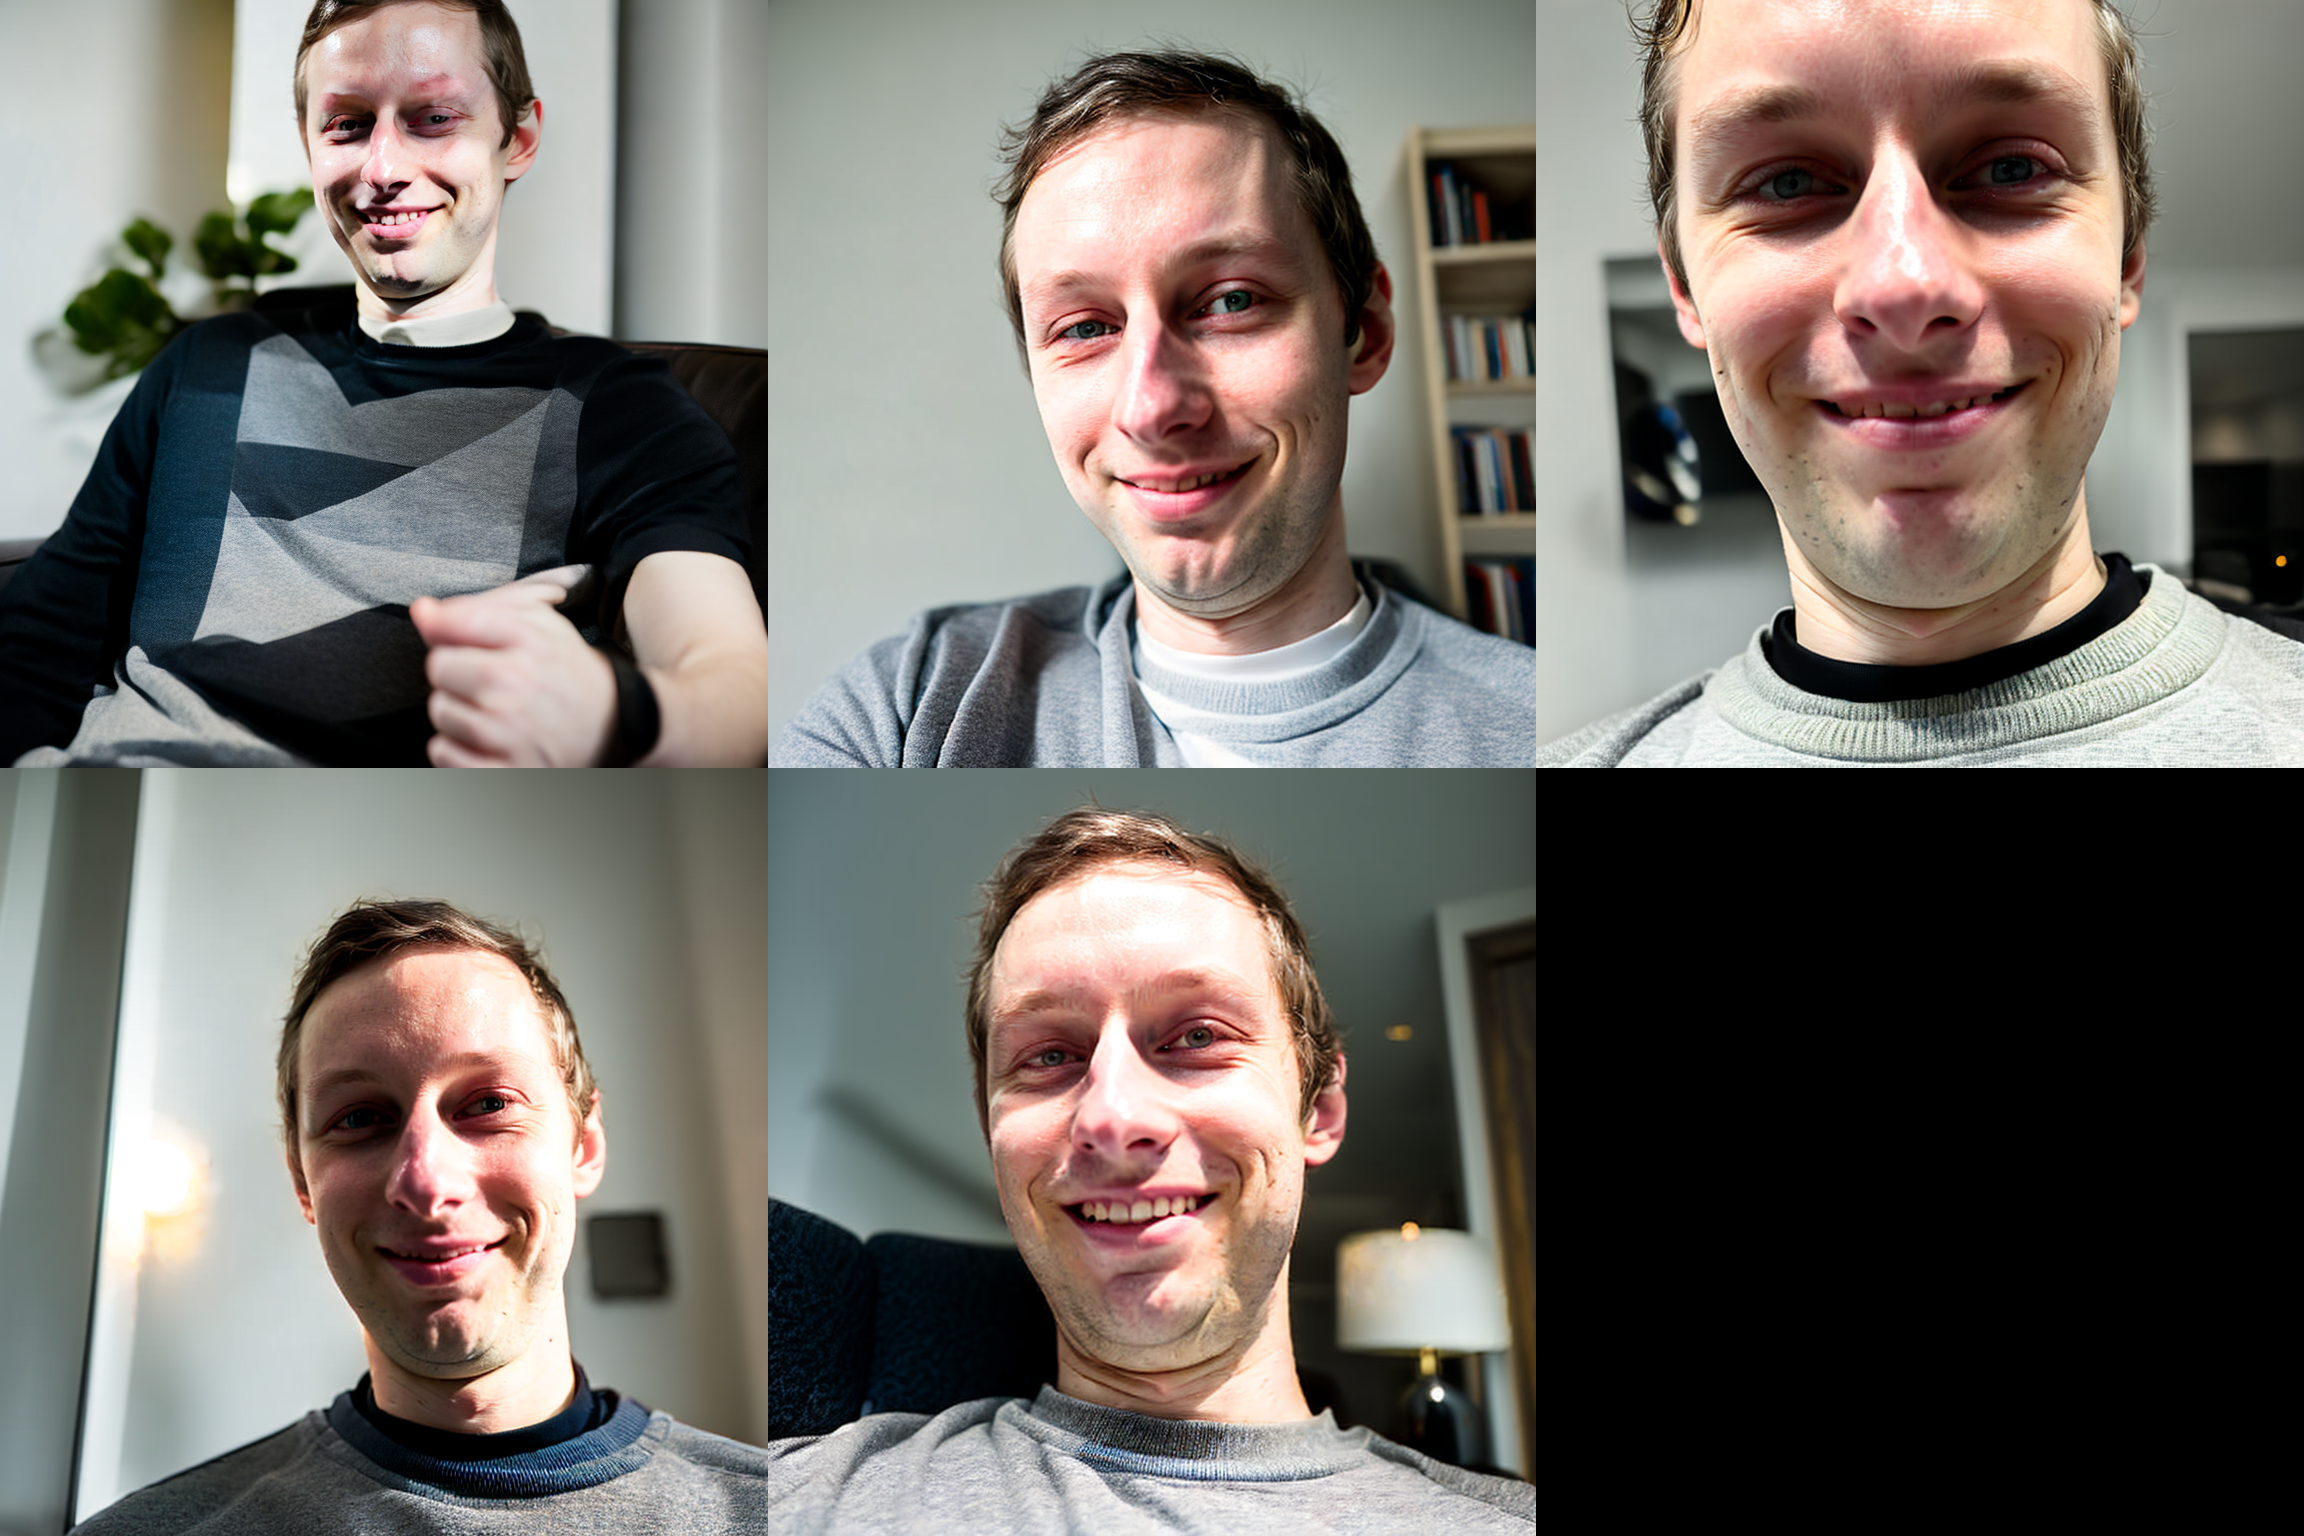

In [7]:
image_grid(image, rows=2, cols=3)